<a href="https://colab.research.google.com/github/abdulloshoh/DataScience_mohirdev/blob/master/Diabet_India_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as p
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
%matplotlib inline
url='https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/diabetes.csv'
df = p.read_csv(url)
df.sample(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
268,0,102,52,0,0,25.1,0.078,21,0
158,2,88,74,19,53,29.0,0.229,22,0
61,8,133,72,0,0,32.9,0.270,39,1
583,8,100,76,0,0,38.7,0.190,42,0
279,2,108,62,10,278,25.3,0.881,22,0
709,2,93,64,32,160,38.0,0.674,23,1
754,8,154,78,32,0,32.4,0.443,45,1
408,8,197,74,0,0,25.9,1.191,39,1
343,5,122,86,0,0,34.7,0.290,33,0
272,3,122,78,0,0,23.0,0.254,40,0


In [ ]:
df.shape

(768, 9)

In [ ]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [ ]:
#Pregnancies: homilador bo'lish soni
#Glucose: glyukozaga test natijasi
#BloodPressure: diastolik qon bosimi (mm Hg)
#SkinThickness: Triceps teri burmasining qalinligi (mm)
#Insulin: 2 soatlik sarum insulini (mu U/ml)
#BMI: Tana massasi indeksi (vazn kg / (m bo'yi) ^ 2)
#DiabetesPedigreeFunction: diabetning naslchilik funktsiyasi
#Age: Yosh (yil)
#Outcome: Class (0 - diabet yo'q, 1 - diabet)

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
corr_matrics = df.corr().abs()
corr_matrics.style.background_gradient(cmap='coolwarm')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,0.081672,0.073535,0.017683,0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,0.113970,0.074752
Insulin,0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,0.113970,0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [ ]:
df.corrwith(df['Outcome']).sort_values(ascending=False)

Outcome                     1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
dtype: float64

In [ ]:
df.dropna(inplace=True)

x = df.drop('Outcome', axis=1)
y = df['Outcome']



In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X = scaler.fit_transform(x)


In [ ]:

from sklearn.model_selection import train_test_split

x_train , x_test , y_train , y_test = train_test_split( x,y, test_size=0.2, random_state=12)

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(x_train , y_train)


KNeighborsClassifier()

In [ ]:
y_predict = knn.predict(x_test)
y_predict

array([0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0])

In [ ]:
from sklearn.metrics import jaccard_score

jaccard_score(y_test, y_predict)

0.36363636363636365

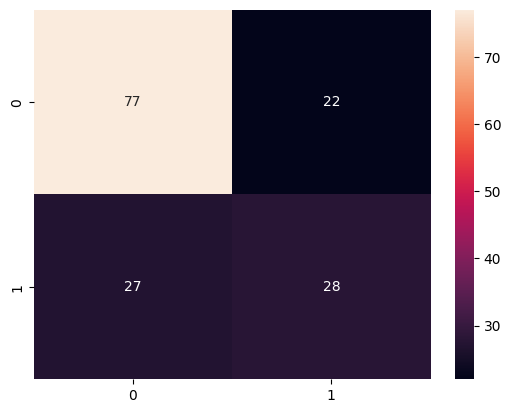

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sb
import matplotlib.pyplot as plt

sb.heatmap(confusion_matrix(y_test, y_predict), annot=True )
plt.show()

In [ ]:
confusion_matrix(y_test, y_predict)

array([[77, 22],
       [27, 28]])

In [ ]:
from sklearn.model_selection import cross_val_predict

predict = cross_val_predict(estimator=knn , X=X, y=y, cv=5)

from sklearn.metrics import classification_report

print('Classification report : \n', classification_report(y,predict))

Classification report : 
               precision    recall  f1-score   support

           0       0.78      0.83      0.80       500
           1       0.64      0.55      0.59       268

    accuracy                           0.73       768
   macro avg       0.71      0.69      0.70       768
weighted avg       0.73      0.73      0.73       768



In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': np.arange(1, 25)}

knn_gscv = GridSearchCV(knn, param_grid, cv=5)

knn_gscv.fit(X, y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])})

In [ ]:
knn_gscv.cv_results_['rank_test_score']


array([24, 23, 15, 18, 22, 21, 17, 16, 20, 19, 14,  9,  4, 11,  3, 12,  1,
        6,  2,  8,  5, 10,  7, 13], dtype=int32)

In [ ]:
knn_gscv.best_params_


{'n_neighbors': 17}

In [ ]:
knn_gscv.best_score_


0.7669892199303965

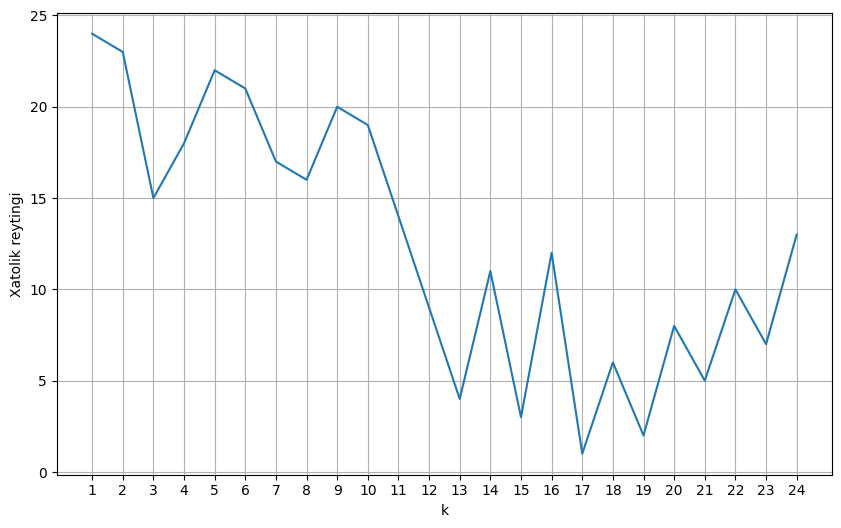

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(param_grid['n_neighbors'], knn_gscv.cv_results_['rank_test_score'])
plt.xticks(param_grid['n_neighbors'])
plt.xlabel("k")
plt.ylabel("Xatolik reytingi")
plt.grid()
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split

x_train , x_test , y_train , y_test = train_test_split( x,y, test_size=0.2, random_state=12)

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=17)

knn.fit(x_train , y_train)


KNeighborsClassifier(n_neighbors=17)

In [ ]:
y_predict = knn.predict(x_test)
y_predict

array([0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0])

In [ ]:
from sklearn.metrics import jaccard_score

jaccard_score(y_test, y_predict)

0.47058823529411764

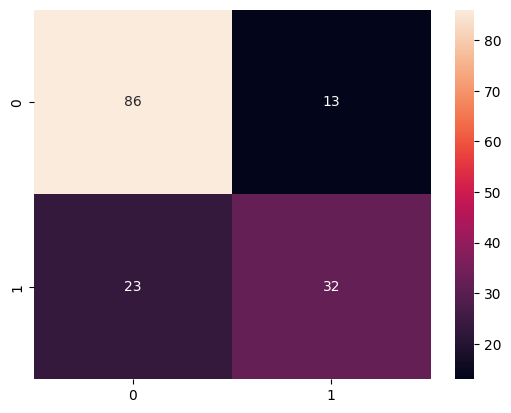

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sb
import matplotlib.pyplot as plt

sb.heatmap(confusion_matrix(y_test, y_predict), annot=True )
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_predict

predict = cross_val_predict(estimator=knn , X=X, y=y, cv=5)

from sklearn.metrics import classification_report

print('Classification report : \n', classification_report(y,predict))

Classification report : 
               precision    recall  f1-score   support

           0       0.78      0.89      0.83       500
           1       0.72      0.54      0.62       268

    accuracy                           0.77       768
   macro avg       0.75      0.71      0.73       768
weighted avg       0.76      0.77      0.76       768

